*Stanislav Borysov [stabo@dtu.dk], DTU Management*
# Advanced Business Analytics

## Recommender Systems

*Based on the data from MovieLens and the notebook by Daniil Barysevich*

The purpose of this exercise is to explore the basics of Recommender Systems and to give you some intuition with code examples. It covers some popular algorithms and strategies but does not get deeply into advanced techniques or evaluation metrics.

### Contents

1. Introduction
2. Non-Personalized Recommender Systems
3. Personalized Recommender Systems   
 3.1. Content-Based Filtering  
 3.2. Collaborative Filtering
``` 
      3.2.1. User-user collaborative filtering
      3.2.2. Item-item collaborative filtering
``` 
 3.3. Matrix factorization  
 3.4. Hybrid Recommender Systems
4. Playtime: Bringing all together
5. Conclusion

### 1. Introduction

(some background information and Wikipedia text)

A *recommender system* or a *recommendation system* (sometimes replacing "system" with a synonym such as a *platform* or an *engine*) is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. There are also recommender systems for experts, collaborators, jokes, restaurants, garments, financial services, life insurance, romantic partners (online dating), and Twitter pages.

Recommender systems typically produce a list of recommendations in one of two ways:
 - Non-personalized approach
 - Personalized approach
 
Personalized-based recommender systems also have common subtypes:
 - Collaborative filtering recommender systems
 - Content-based recommender systems
 
All the techniques mentioned above have their problems and pitfalls, which developers face creating and applying recommender systems to real-world problems. They must be taken into account while designing the system architecture and will be covered later in this work. Though the field of recommendation itself is relatively old, there are still no solutions that work perfectly for every case. Designing and evaluating a recommender system is hard, and requires a deep understanding of domain knowledge and data available, as well as constant experimenting and modification. First recommender systems appeared a long time ago in the 1990s, but the intense research started quite recently with the availability of better computational power and tremendous amounts of data coming from the internet.

One of the events that energized research in recommender systems was the Netflix Prize. From 2006 to 2009, Netflix sponsored a competition, offering a grand prize of $1,000,000 to the team that could take an offered dataset of over 100 million movie ratings and return recommendations that were 10% more accurate than those offered by the company's existing recommender system.

This competition energized the search for new and more accurate algorithms. The most accurate algorithm in 2007 used an ensemble method of 107 different algorithmic approaches, blended into a single prediction:

>Predictive accuracy is substantially improved when blending multiple predictors. Our experience is that most efforts should be concentrated in deriving substantially different approaches, rather than refining a single technique. Consequently, our solution is an ensemble of many methods.

Beside classical approaches to recommendation with techniques described above, there are a lot of different cases that require modifications or special settings:
 - Group recommender systems
 - Context-aware recommender systems
 - Risk-aware recommender systems

### 2. Non-personalized Recommendation

Though non-personalized recommenders are rarely used in modern systems by themselves, they are still very powerful in combination with other algorithms, and, sometimes, the only available option. 

How can we make a recommendation for a user that we have little or no data about? 

That's where stereotype-based recommendations can be made, and most of the times we can take into account:
 - items popularity
 - user demographic data 
 - user actions during that particular session (for example, items in online-shop basket)
 
**Mean-based recommendation:** 

One of the common approaches we can use is a mean-based recommendation. In the simplest case, we can use mean rating for the item, $\mu_i$, to recommend items with the highest rating

$$\mu_i = \frac{\sum_x r_{xi}}{N_{i}}$$

where $r_{xi}$ is the rating for the item $i$ by the user $x$ and $N_{i}$ is the number of ratings for the item.

**Associative rule recommendation:**

This approach is used to recommend items that are related to chosen one ("People who buy this also bought...") and, therefore, uses *reference item* to provide recommendations.

The association rule formula is derived from Bayes theorem:

$$P(i|j) = \frac{P(i \vee j)}{P(j)}$$

In this case, *j* is the *reference item*, and *i* is an item to be scored. We estimate probabilities by counting: $P(j)$ is the fraction of users in the system who
purchased item $j$; $P(i\vee j)$ is the fraction that purchased both $i$ and $j$.

**Example**

The following tasks cover some examples of non-personalized data analysis based on the MovieLens dataset. Please note that there are several different data files used in this notebook for different tasks. For this task, we will use the data from `data/HW1-data.csv`. Please load the data from the file.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/HW1-data.csv')
data

,User,"Gender (1 =F, 0=M)",260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN
5,3823,1,2.0,4.0,4.0,4.0,NaN,NaN,3.0,1.0,...,5.0,2.0,4.0,NaN,1.0,NaN,NaN,3.0,NaN,2.0
6,5448,0,NaN,NaN,3.0,1.0,1.0,4.0,NaN,5.0,...,1.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,5.0,2.0
7,5347,0,4.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,...,NaN,2.0,3.0,2.0,4.0,NaN,1.0,3.0,5.0,NaN
8,4117,1,5.0,1.0,NaN,4.0,2.0,4.0,4.0,4.0,...,2.0,3.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,2765,0,4.0,2.0,NaN,5.0,3.0,NaN,4.0,3.0,...,NaN,NaN,2.0,NaN,NaN,2.0,5.0,1.0,NaN,NaN


First, find the range of ratings (minimum and maximum values) in the whole dataset.

In [3]:
print("Minimum rating:", data.iloc[:, 2:].min().min())
print("Maximum rating:", data.iloc[:, 2:].max().max())

Minimum rating: 1.0
Maximum rating: 5.0


The output should be the following:
```
Minimum rating: 1.0
Maximum rating: 5.0
```

Let's calculate top movies by their mean score

In [4]:
# Top movies by mean score
means = data.iloc[:, 2:].mean().sort_values(ascending=False)
means

318: Shawshank Redemption, The (1994)                      3.600000
260: Star Wars: Episode IV - A New Hope (1977)             3.266667
541: Blade Runner (1982)                                   3.222222
1265: Groundhog Day (1993)                                 3.166667
593: Silence of the Lambs, The (1991)                      3.062500
296: Pulp Fiction (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
2028: Saving Private Ryan (1998)                           3.000000
34: Babe (1995)                                            3.000000
527: Schindler's List (1993)                               3.000000
3578: Gladiator (2000)                                     2.916667
2396: Shakespeare in Love (1998)                           2.909091
1198: Raiders of the Lost Ark (1981)                       2.909091
2571: Matrix, The (1999)                                   2.833333
2762: Sixth Sense, The (1999)                   

...and rating counts for each movie:

In [5]:
# Counts
counts = data.iloc[:, 2:].count()
counts.sort_values(ascending=False)

1: Toy Story (1995)                                        17
593: Silence of the Lambs, The (1991)                      16
260: Star Wars: Episode IV - A New Hope (1977)             15
1210: Star Wars: Episode VI - Return of the Jedi (1983)    14
780: Independence Day (ID4) (1996)                         13
2762: Sixth Sense, The (1999)                              12
527: Schindler's List (1993)                               12
2571: Matrix, The (1999)                                   12
1265: Groundhog Day (1993)                                 12
2916: Total Recall (1990)                                  12
3578: Gladiator (2000)                                     12
2028: Saving Private Ryan (1998)                           11
1259: Stand by Me (1986)                                   11
296: Pulp Fiction (1994)                                   11
1198: Raiders of the Lost Ark (1981)                       11
2396: Shakespeare in Love (1998)                           11
318: Sha

Sometimes, we do not need to know a precise rating to make a recommendation. Therefore, we can define some ratings as positive (for example, all the ratings >= 4). Print top movies by the percentage of positive marks:

In [6]:
# Top movies by percentage of positive marks
counts_positive = data.iloc[:, 2:][data.iloc[:, 2:] >= 4].count()
counts_positive.sort_values(ascending=False)
(counts_positive / counts).sort_values(ascending=False)

318: Shawshank Redemption, The (1994)                      0.700000
260: Star Wars: Episode IV - A New Hope (1977)             0.533333
3578: Gladiator (2000)                                     0.500000
541: Blade Runner (1982)                                   0.444444
593: Silence of the Lambs, The (1991)                      0.437500
2571: Matrix, The (1999)                                   0.416667
1265: Groundhog Day (1993)                                 0.416667
34: Babe (1995)                                            0.400000
296: Pulp Fiction (1994)                                   0.363636
2028: Saving Private Ryan (1998)                           0.363636
1259: Stand by Me (1986)                                   0.363636
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.357143
1: Toy Story (1995)                                        0.352941
527: Schindler's List (1993)                               0.333333
2762: Sixth Sense, The (1999)                   

Let's imagine we watched the movie "Toy Story" and we want to have a list of relevant movies to watch next. We can apply association rule here. Range movies by the percentage of people who also watched Toy Story:

In [7]:
associative_product = '1: Toy Story (1995)'
watched_product = data.iloc[:, 2:][data[associative_product].notnull()].count()
(watched_product / data[associative_product].count()).sort_values(ascending=False)

1: Toy Story (1995)                                        1.000000
260: Star Wars: Episode IV - A New Hope (1977)             0.823529
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.764706
593: Silence of the Lambs, The (1991)                      0.764706
780: Independence Day (ID4) (1996)                         0.764706
1265: Groundhog Day (1993)                                 0.647059
2916: Total Recall (1990)                                  0.647059
296: Pulp Fiction (1994)                                   0.588235
2762: Sixth Sense, The (1999)                              0.588235
527: Schindler's List (1993)                               0.588235
3578: Gladiator (2000)                                     0.529412
1259: Stand by Me (1986)                                   0.529412
1198: Raiders of the Lost Ark (1981)                       0.529412
2571: Matrix, The (1999)                                   0.529412
2028: Saving Private Ryan (1998)                

Making recommendations above, we did not use data about the user's gender. Statistically, men and women tend to like or dislike different kinds of movies, so, to make non-personalized recommendations more precise, we can take this information into account and see the difference. Find and print mean ratings for each movie as well as global mean ratings for male and female users:

In [8]:
# Means separate by gender
gender_column_name = 'Gender (1 =F, 0=M)'
male_means = data.iloc[:, 2:][data[gender_column_name] == 0].mean()
female_means = data.iloc[:, 2:][data[gender_column_name] == 1].mean()

In [9]:
# Male means
male_means.sort_values(ascending=False)

1198: Raiders of the Lost Ark (1981)                       3.666667
527: Schindler's List (1993)                               3.500000
1265: Groundhog Day (1993)                                 3.500000
318: Shawshank Redemption, The (1994)                      3.400000
593: Silence of the Lambs, The (1991)                      3.333333
2571: Matrix, The (1999)                                   3.142857
2028: Saving Private Ryan (1998)                           3.142857
260: Star Wars: Episode IV - A New Hope (1977)             3.125000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1259: Stand by Me (1986)                                   3.000000
541: Blade Runner (1982)                                   3.000000
780: Independence Day (ID4) (1996)                         2.857143
3578: Gladiator (2000)                                     2.833333
2762: Sixth Sense, The (1999)                              2.666667
296: Pulp Fiction (1994)                        

In [10]:
#Female means
female_means.sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           4.250000
296: Pulp Fiction (1994)                                   4.000000
318: Shawshank Redemption, The (1994)                      3.800000
1: Toy Story (1995)                                        3.571429
541: Blade Runner (1982)                                   3.500000
34: Babe (1995)                                            3.428571
260: Star Wars: Episode IV - A New Hope (1977)             3.428571
3578: Gladiator (2000)                                     3.000000
2762: Sixth Sense, The (1999)                              3.000000
356: Forrest Gump (1994)                                   3.000000
1210: Star Wars: Episode VI - Return of the Jedi (1983)    3.000000
1265: Groundhog Day (1993)                                 2.833333
2028: Saving Private Ryan (1998)                           2.750000
593: Silence of the Lambs, The (1991)                      2.714286
780: Independence Day (ID4) (1996)              

In [11]:
# Overall mean ratings 
male_average_mean = data.iloc[:, 2:][data[gender_column_name] == 0].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 0].count().sum()#Sum of values of a data set divided by number of values
female_average_mean = data.iloc[:, 2:][data[gender_column_name] == 1].sum().sum() / data.iloc[:, 2:][data[gender_column_name] == 1].count().sum()
print("Male avg. mean: {} Female avg. mean: {}".format(male_average_mean, female_average_mean))

Male avg. mean: 2.905511811023622 Female avg. mean: 2.9473684210526314


Find movies that female users rate higher than male raters:

In [12]:
(female_means - male_means).sort_values(ascending=False)

2396: Shakespeare in Love (1998)                           2.107143
34: Babe (1995)                                            1.428571
296: Pulp Fiction (1994)                                   1.375000
1: Toy Story (1995)                                        1.271429
356: Forrest Gump (1994)                                   0.750000
541: Blade Runner (1982)                                   0.500000
318: Shawshank Redemption, The (1994)                      0.400000
2762: Sixth Sense, The (1999)                              0.333333
260: Star Wars: Episode IV - A New Hope (1977)             0.303571
3578: Gladiator (2000)                                     0.166667
1210: Star Wars: Episode VI - Return of the Jedi (1983)    0.000000
780: Independence Day (ID4) (1996)                        -0.190476
2028: Saving Private Ryan (1998)                          -0.392857
2916: Total Recall (1990)                                 -0.485714
1259: Stand by Me (1986)                        

### 3. Personalized Recommendation

All the personalized recommendation require a certain amount of data collected about users. Data could either be collected implicitly (products user click on, see) and explicitly (in forms of ratings, surveys, polls). Both methods are used widely and can be combined depending on the system restrictions and type of recommendations.

#### 3.1 Content-based filtering (linear model)

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. The user profile is represented with the same terms and built up by analyzing the content of items which have been seen by the user.

Several issues have to be considered when implementing a content-based filtering system. First, terms can either be assigned automatically or manually. When terms are assigned automatically a method has to be chosen that can extract these terms from items. Second, the terms have to be represented such that both the user profile and the items can be compared in a meaningful way. Third, a learning algorithm has to be chosen that can learn the user profile based on seen items and can make recommendations based on this user profile.

The greatest advantage in "linear" content-based filtering systems is that the recommendations provided can easily be interpreted to the user because we always know what "features" about a particular item made algorithm rate it higher.

The example of content-based filtering applied to news recommendation based on terms contained in a document. Import the raw data from the excel file `data/cbf.xls`. To do this, the Pandas function `pd.read_excel(file)` can be used.

In [13]:
raw_data = pd.read_excel("data/cbf.xls", index_col=0)
raw_data

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family,Unnamed: 11,num-attr,Unnamed: 13,User 1,User 2,Unnamed: 16,Pred1,Pred2
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,5.0,NaN,1.0,-1.0,NaN,NaN,NaN
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,4.0,NaN,-1.0,1.0,NaN,NaN,NaN
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


The file contains topics for the documents and ratings of two users. Let's create two separate dataframes for these data.

In [14]:
docs = raw_data.loc['doc1':'doc20', 'baseball':'family']
docs

,baseball,economics,politics,Europe,Asia,soccer,war,security,shopping,family
doc1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
doc2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
doc3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
doc4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
doc5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
doc6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
doc7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
doc8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
doc9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
doc10,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [15]:
user_ranks = raw_data.loc['doc1':'doc20', 'User 1':'User 2']
#user_ranks.fillna(0, inplace=True)
user_ranks

,User 1,User 2
doc1,1.0,-1.0
doc2,-1.0,1.0
doc3,NaN,NaN
doc4,NaN,1.0
doc5,NaN,NaN
doc6,1.0,NaN
doc7,NaN,NaN
doc8,NaN,NaN
doc9,NaN,NaN
doc10,NaN,NaN


The value of 1.0 means the user liked the document, the value of -1.0 - disliked. NaN means that the user has never seen the document (and we have to predict rating).

In the simplest case, we can learn user profiles using logistic regression corresponding to the binary problem - the probability of an item being liked by the user. Let's train a separate logistic regression model for each user. Do not forget to re-assign 0 to "dislike" values instead of -1 to make the logistic regression applicable. As usual, you can use `sklearn.linear_model.LogisticRegression`.

In [16]:
n_users = len(user_ranks.columns)#n_users=2
n_docs = len(user_ranks)#n_docs=20
n_features = len(docs.columns)#n_features=10

In [17]:
X_users = [docs.iloc[user_ranks["User {}".format(i+1)].notna().values].values for i in range(n_users)]
Y_users = [user_ranks[user_ranks["User {}".format(i+1)].notna()]["User {}".format(i+1)].values for i in range(n_users)]
# scale labels
Y_users = [(y+1)/2 for y in Y_users]

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_hyperparams = {'penalty':'l2', 'C':1000, 'solver':'lbfgs'}

In [20]:
user_profiles = [LogisticRegression(**lr_hyperparams) for i in range(n_users)]
user_profiles = [model.fit(X_users[i], Y_users[i]) for i, model in enumerate(user_profiles)]

Check the coefficients of the regression. What you can tell about each user?

In [21]:
for i in range(n_users):
    print(80 * '-')
    print("User", i)
    print("Overall bias:", user_profiles[i].intercept_[0])
    print("Preferences by topics:")
    for j in range(n_features):
        print(docs.columns.values[j], '\t',user_profiles[i].coef_[0][j])
# The  v shows an average bias: User 1 is more positive on average than User 2.
# Other coefficients are contributions of the features: 
# User 1 likes baseball and dislikes economics, etc.
# User 2 dislikes baseball and likes Europe, etc.

--------------------------------------------------------------------------------
User 0
Overall bias: 2.2463670756062513
Preferences by topics:
baseball 	 4.105577694621429
economics 	 -4.117986741738898
politics 	 -2.1376112291174874
Europe 	 -0.11742309778911618
Asia 	 -0.07256926883679943
soccer 	 2.1579588321298573
war 	 -2.0529447814582094
security 	 -2.06504196028069
shopping 	 0.17758331950844727
family 	 -0.07256926883679943
--------------------------------------------------------------------------------
User 1
Overall bias: -0.7911736607563884
Preferences by topics:
baseball 	 -2.7950262682883795
economics 	 1.0598592043313981
politics 	 1.6940387606144875
Europe 	 2.7644685229524195
Asia 	 -1.0704297623379309
soccer 	 -2.7950262682883795
war 	 -0.019987187329428557
security 	 2.7644685229524195
shopping 	 0.0
family 	 -1.0704297623379309


Range the documents by the probability of being liked by the users

In [22]:
X = docs.values
docs_names = docs.index.values
for i in range(n_users):
    print(80 * '-')
    print("User", i)
    prob = user_profiles[i].predict_proba(X)
    doc_prob = list(zip(docs_names, prob))
    doc_prob.sort(reverse=True, key=lambda x: x[1][1])
    for j in range(n_docs):
        print(doc_prob[j][0], '\t{:.2f}'.format(doc_prob[j][1][1]))

--------------------------------------------------------------------------------
User 0
doc16 	1.00
doc12 	1.00
doc6 	1.00
doc1 	1.00
doc9 	0.99
doc3 	0.99
doc18 	0.91
doc11 	0.55
doc15 	0.54
doc7 	0.53
doc5 	0.15
doc20 	0.13
doc8 	0.11
doc13 	0.10
doc14 	0.02
doc10 	0.02
doc4 	0.02
doc2 	0.00
doc17 	0.00
doc19 	0.00
--------------------------------------------------------------------------------
User 1
doc2 	1.00
doc17 	1.00
doc4 	1.00
doc13 	1.00
doc14 	0.99
doc20 	0.97
doc8 	0.93
doc18 	0.88
doc15 	0.87
doc7 	0.71
doc11 	0.46
doc19 	0.45
doc5 	0.31
doc6 	0.31
doc10 	0.31
doc3 	0.13
doc9 	0.03
doc16 	0.00
doc12 	0.00
doc1 	0.00


#### 3.2 Collaborative filtering

Collaborative filtering, also referred to as social filtering, filters information by using the recommendations of other people. It is based on the idea that people who agreed in their evaluation of certain items in the past are likely to agree again in the future. A person who wants to see a movie, for example, might ask for recommendations from friends. The recommendations of some friends who have similar interests are trusted more than recommendations from others. This information is used in the decision on which movie to see.

Collaborative filtering often uses the concept of **neighborhood** (the amount of people/items we base our prediction on). Making neighborhoods too small results in not enough information for accurate prediction, and making them too big results in high computational complexity and letting noize in systems. Neighborhood size is a hyperparameter which needs to be tuned in every system. Distance between neighbors can be defined using such metrics as cosine similarity.

One of the most common problems all collaborative filtering recommender systems face - a so-called "cold start" problem, when we either:
 - do not have enough ratings for a new user to find neighbors
 - do not have enough ratings for a new item to find neighbors
 - have a completely new system without any data to make recommendations
 
In each of those cases, problems might be solved differently depending on the particular case and options available.

##### 3.2.1 User-user collaborative filtering

In user-user collaborative filtering, we provide a recommendation based on tastes of other users similar to us. The problem with that algorithm is that we need a lot of information about other people to provide correct recommendations, but the main benefits are effectiveness and ability to provide new, unexpected, and, yet, good recommendations.

In order to account for user's tendecy to give higher/lower ratings, we will use normalization again. Algorithm for providing score based on user-user collaborative filtering is defined as:

$$ r_{xi} = \mu_{x} + \frac{\Sigma_{y \in \mathbf{K}}sim(x,y)(r_{yi}-\mu_{y})}{\Sigma_{y \in \mathbf{K}}|sim(x,y)|}  $$

Where $\mu_x$ is a mean rating for a user and $sim$ can be defined in different ways, for example, as cosine similarity or correlation.

For this example, we will use the data from the `data/data.xls` file. Again, to read the file, the pandas function `pd.read_excel(file)` can be used.

In [23]:
data = pd.read_excel("data/data.xls", index_col=0)
data

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
1648,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,5.0,3.5,3.0,NaN,3.5,NaN
5136,4.5,5.0,5.0,4.0,5.0,5.0,5.0,3.0,NaN,5.0,...,1.0,5.0,NaN,NaN,NaN,5.0,5.0,4.5,4.0,NaN
918,5.0,5.0,4.5,NaN,3.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
2824,4.5,NaN,5.0,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,4.0,4.0,4.5,NaN,4.0,3.0,NaN,NaN,NaN,4.5,...,1.0,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.5,3.0
860,4.0,4.0,4.5,NaN,2.5,3.0,NaN,4.0,4.5,NaN,...,4.0,4.0,NaN,NaN,3.5,3.5,3.5,NaN,NaN,3.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2968,5.0,4.5,5.0,2.0,5.0,0.5,0.5,2.5,3.0,3.0,...,2.0,5.0,2.5,3.5,5.0,5.0,2.0,5.0,4.5,1.5
3525,4.0,4.0,4.5,3.5,3.0,3.5,4.0,3.5,4.5,4.0,...,4.0,4.5,3.5,3.5,2.5,3.5,4.0,4.0,4.0,3.0
4323,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,3.5,5.0,...,5.0,4.0,3.5,NaN,3.0,4.0,3.0,5.0,5.0,2.0


Plot a correlation matrix between different users. Note, that the pandas' function `corr()` ignores missing values so it does the extra job to find overlapping rating sets for you!

In [24]:
correlations = data.transpose().corr()
correlations

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,...,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,...,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,...,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,...,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,...,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
860,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,...,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
3712,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,...,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
2968,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,...,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
3525,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,...,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
4323,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,...,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

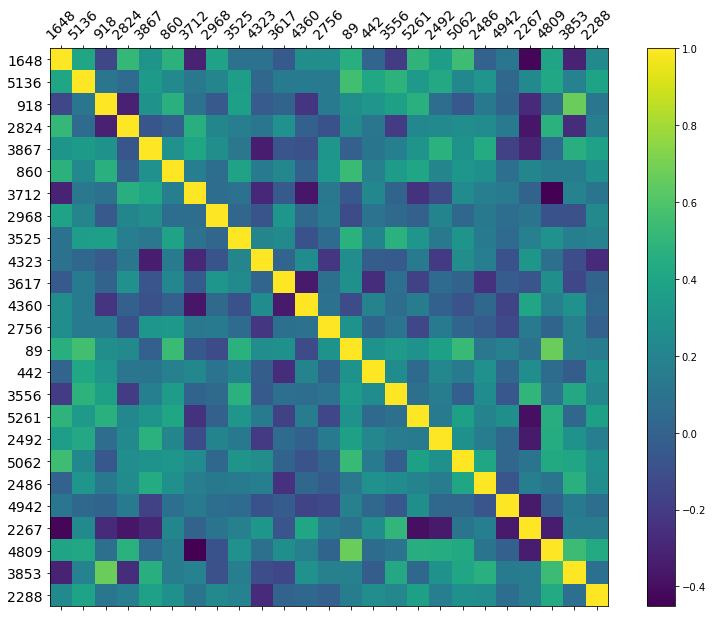

In [26]:
f = plt.figure(figsize=(14, 10))
plt.matshow(correlations, fignum=f.number)
plt.xticks(range(correlations.shape[1]), correlations.columns, fontsize=14, rotation=45)
plt.yticks(range(correlations.shape[1]), correlations.columns, fontsize=14)
cb = plt.colorbar()

For this example, we will make predictions for user 3867. Our 'neighborhood' for a user - users with $K=5$ highest correlations. Find these users and print their ratings and correlations to user 3867.

In [27]:
K = 5
user_id = 3867

In [28]:
# selecting K neighbors 
neighbours_corr = correlations[user_id].sort_values(ascending=False)[1: K+1]
neighbours_corr

2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64

In [29]:
neighbours_ratings = data.loc[neighbours_corr.index]
neighbours_ratings

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
2492,4.5,3.5,3.5,3.5,4.0,4.0,NaN,4.0,4.0,5.0,...,NaN,4.0,3.0,NaN,3.5,5.0,4.0,3.0,2.0,4.0
3853,NaN,NaN,3.5,NaN,NaN,5.0,5.0,4.0,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2486,3.5,2.0,4.5,3.5,2.5,4.5,3.0,3.5,4.5,4.5,...,0.5,0.5,0.5,3.0,2.5,3.0,2.5,3.5,3.0,1.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2288,NaN,3.5,3.5,NaN,3.5,3.0,NaN,5.0,5.0,3.0,...,0.5,NaN,NaN,NaN,4.0,3.5,NaN,4.0,4.0,NaN


Now, find the top 5 movies to recommend to the user.

In [30]:
# Find a list of missing ratings for the user
missing_ratings = data.loc[user_id]
missing_ratings = missing_ratings[missing_ratings.isnull()]
missing_ratings

14: American Beauty (1999)                                    NaN
38: Eternal Sunshine of the Spotless Mind (2004)              NaN
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                 NaN
77: Memento (2000)                                            NaN
105: Back to the Future (1985)                                NaN
107: Snatch (2000)                                            NaN
134: O Brother Where Art Thou? (2000)                         NaN
141: Donnie Darko (2001)                                      NaN
146: Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)   NaN
153: Lost in Translation (2003)                               NaN
187: Sin City (2005)                                          NaN
194: Amelie (2001)                                            NaN
197: Braveheart (1995)                                        NaN
243: High Fidelity (2000)                                     NaN
274: The Silence of the Lambs (1991)                          NaN
275: Fargo

In [31]:
# make predictions
user_mean = data.loc[user_id].mean()
neighbours_means = neighbours_ratings.mean(axis=1)
for movie_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[movie_name]): continue
        rating += neighbours_corr.loc[neighbour_id] * (row[movie_name] - neighbours_means.loc[neighbour_id])
        weights_sum += abs(neighbours_corr.loc[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += user_mean
    missing_ratings.at[movie_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

77: Memento (2000)                               4.777803
275: Fargo (1996)                                4.771538
807: Seven (a.k.a. Se7en) (1995)                 4.655569
194: Amelie (2001)                               4.449936
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    4.396449
Name: 3867, dtype: float64

The output should look like the following:
```
77: Memento (2000)                               4.777803
275: Fargo (1996)                                4.771538
807: Seven (a.k.a. Se7en) (1995)                 4.655569
194: Amelie (2001)                               4.449936
63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    4.396449
```

##### 3.2.2 Item-item collaborative filtering

In item-item collaborative filtering, we provide a recommendation based on other items similar to us. The benefits of it, compared to user-user collaborative filtering, is that we usually need much fewer similarity computations (in most cases, there are much more users in systems than items). The most common pitfall - the system can provide very obvious recommendations.

Score provided by item-item filtering is computed using the following formula:

$$ r_{xi} = \mu_{i} + \frac{\Sigma_{j \in \mathbf{K}}sim(i,j)(r_{xj}-\mu_{j})}{\Sigma_{j \in \mathbf{K}}|sim(i,j)|}  $$

Where $\mu_i$ is a mean rating for an item and $sim$ can be defined in different ways, for example, as cosine similarity or correlation.

Let's skip the visualization part and directly do the same top 5 predictions for the same user using the item-item algorithm. Note, that now we need to find new nearest neighbors for each movie to make this prediction.

In [32]:
K = 5
user_id = 3867

In [33]:
correlations = data.corr()

In [34]:
for movie_name, val in missing_ratings.iteritems():
    rating = 0
    weights_sum = 0
    neighbours_corr = correlations[movie_name].sort_values(ascending=False)[1: K+1]
    item_mean = data[movie_name].mean()
    neighbours_ratings = data[neighbours_corr.index].transpose()
    neighbours_means = neighbours_ratings.mean(axis=1)
    for neighbour_id, row in neighbours_ratings.iterrows():
        if np.isnan(row[user_id]): continue
        rating += neighbours_corr[neighbour_id] * (row[user_id] - neighbours_means[neighbour_id])
        weights_sum += abs(neighbours_corr[neighbour_id])
    if weights_sum > 0:
        rating /= weights_sum
    rating += item_mean
    missing_ratings.at[movie_name] = rating
missing_ratings.sort_values(ascending=False)[0:5]

77: Memento (2000)                                             4.640297
807: Seven (a.k.a. Se7en) (1995)                               4.481565
146: Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)    4.478644
153: Lost in Translation (2003)                                4.415375
194: Amelie (2001)                                             4.207079
Name: 3867, dtype: float64

The output should look the following:
```
77: Memento (2000)                                             4.640297
807: Seven (a.k.a. Se7en) (1995)                               4.481565
146: Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)    4.478644
153: Lost in Translation (2003)                                4.415375
194: Amelie (2001)                                             4.207079
```

In this case, the recommendations using both algorithms are similar. However, in practice, the item-item algorithm produces better recommendations as it is easier to capture the similarity between items rather than users.

#### 3.3 Matrix factorization

In matrix factorization techniques, we usually represent the rating matrix as a product of 3 other matrices.

$$R = P\Sigma Q^{T}$$

The benefits of those techniques are that they can dramatically improve system performance by reducing the necessary amount of space. Collaborative techniques can be later applied on decomposed matrices. 

`surprise` is an easy-to-use Python package for recommender systems. Please refer to their [project page](http://surpriselib.com/) and [document page](http://surprise.readthedocs.io/en/stable/index.html#) for details of installation and tutorials. Here I will use the famous [SVD algorithm](http://sifter.org/simon/journal/20061211.html). The document for this model in the Surprise page is [here](http://surprise.readthedocs.io/en/stable/matrix_factorization.html)

We will do the same exercise as in the previous subsections and try to recommend movies to User 3867.

In [35]:
from surprise import SVD
from surprise.dataset import Reader, Dataset

To proceed, the data for the `surprise` package should be represented in the following format: 
```
userID, movieID, rating
```
Let's create a dataframe for this:

In [36]:
data = pd.read_excel("data/data.xls", index_col=0)

data.head()

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
1648,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,5.0,3.5,3.0,NaN,3.5,NaN
5136,4.5,5.0,5.0,4.0,5.0,5.0,5.0,3.0,NaN,5.0,...,1.0,5.0,NaN,NaN,NaN,5.0,5.0,4.5,4.0,NaN
918,5.0,5.0,4.5,NaN,3.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
2824,4.5,NaN,5.0,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,4.0,4.0,4.5,NaN,4.0,3.0,NaN,NaN,NaN,4.5,...,1.0,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.5,3.0


In [37]:

user_ids, movie_ids, ratings = [], [], []
#
for user_id, row in data.iterrows():
    for movie_id in data.columns:
        rating = row[movie_id]
        if not np.isnan(rating):
            user_ids.append(user_id)
            movie_ids.append(movie_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'movieID':movie_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'movieID', 'rating']] # correct order
ratings_df.describe()

,userID,rating
count,1581.000000,1581.000000
mean,3239.301075,3.736559
std,1398.753928,1.042461
min,89.000000,0.500000
25%,2486.000000,3.000000
50%,3525.000000,4.000000
75%,4323.000000,4.500000
max,5261.000000,5.000000


In [38]:
ratings_df['movieID']

0       22: Pirates of the Caribbean: The Curse of the...
1                            24: Kill Bill: Vol. 1 (2003)
2                          105: Back to the Future (1985)
3       146: Crouching Tiger Hidden Dragon (Wo hu cang...
4                             155: The Dark Knight (2008)
                              ...                        
1576                           8467: Dumb & Dumber (1994)
1577                                9802: The Rock (1996)
1578                         9806: The Incredibles (2004)
1579                                  36657: X-Men (2000)
1580                       36658: X2: X-Men United (2003)
Name: movieID, Length: 1581, dtype: object

Now, we can create a dataset in the required format for the package.

In [39]:
# The rating scale should be specified in Reader
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(ratings_df, reader)
data_train_surprise = data_surprise.build_full_trainset() # use the whole training set 

We are ready to run the SVD algorithm. Read [documentation](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) for more details.

In [40]:
n_factors = 15
lr_all = 0.005 # default value
reg_all = 0.02 # default value
#
model = SVD(n_factors=n_factors, lr_all=lr_all, reg_all=reg_all)
model.fit(data_train_surprise)

For this example, we will make the top 5 predictions for User 3867.

In [41]:
user_id = 3867
missing_movies_ids = data[data.isna()].loc[user_id].index
#
recommendations = []
for movie_id in missing_movies_ids:
    r = model.predict(user_id, movie_id, verbose=False).est
    recommendations.append((movie_id, r))
    #print(movie_id)
    #break
recommendations.sort(reverse=True, key=lambda x: x[1])
recommendations[:5]

[('155: The Dark Knight (2008)', 4.3267625995968055),
 ('13: Forrest Gump (1994)', 4.296000566824915),
 ('603: The Matrix (1999)', 4.287511215813386),
 ('275: Fargo (1996)', 4.216395985853057),
 ('77: Memento (2000)', 4.203450996028567)]

The recommendations are now quite different from the previous two algorithms. To estimate performance of the different approaches, we would need to do train/test split (or cross-validation). We will skip this comparison here but you can try to do it yourself if you are interested.

#### 3.4 Hybrid recommender systems

In hybrid recommender systems, recommendations are made usually based on scores provided by multiple recommender systems. The most common technique is to represent the final score as a linear combination of scores provided by other recommenders with according weights. 

Another option is a so-called "switch" recommender system. Given some input, the system decides, which of the available recommender engines is better to use for a recommendation in this particular situation. Such an algorithm helps to overcome problems that exist in each recommender separately.

We also can use so-called "cascade" hybrid recommenders - the system where outputs of one recommendation algorithm are used as inputs to other. 

There are dozens of ways to use hybrid recommender systems, and there is no common way of applying them to a real-world problem. Design and architecture of each of such systems depend on data available, domain field and requirements for a particular system.

### 4. Playtime: Bringing all together

Finally, let's try to build a recommender system based on SVD and evaluate its performance against the common baselines. We will use the same data as before.

In [42]:
# Loading and preparing the dataset
data = pd.read_excel("data/data.xls", index_col=0)
data

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
1648,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,5.0,3.5,3.0,NaN,3.5,NaN
5136,4.5,5.0,5.0,4.0,5.0,5.0,5.0,3.0,NaN,5.0,...,1.0,5.0,NaN,NaN,NaN,5.0,5.0,4.5,4.0,NaN
918,5.0,5.0,4.5,NaN,3.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
2824,4.5,NaN,5.0,NaN,4.5,4.0,NaN,NaN,5.0,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,4.0,4.0,4.5,NaN,4.0,3.0,NaN,NaN,NaN,4.5,...,1.0,4.0,NaN,NaN,NaN,3.0,4.0,4.0,3.5,3.0
860,4.0,4.0,4.5,NaN,2.5,3.0,NaN,4.0,4.5,NaN,...,4.0,4.0,NaN,NaN,3.5,3.5,3.5,NaN,NaN,3.5
3712,NaN,4.5,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,4.0,4.5,NaN,4.5,4.5,4.0
2968,5.0,4.5,5.0,2.0,5.0,0.5,0.5,2.5,3.0,3.0,...,2.0,5.0,2.5,3.5,5.0,5.0,2.0,5.0,4.5,1.5
3525,4.0,4.0,4.5,3.5,3.0,3.5,4.0,3.5,4.5,4.0,...,4.0,4.5,3.5,3.5,2.5,3.5,4.0,4.0,4.0,3.0
4323,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,3.5,5.0,...,5.0,4.0,3.5,NaN,3.0,4.0,3.0,5.0,5.0,2.0


In [43]:

user_ids, movie_ids, ratings = [], [], []
#
for user_id, row in data.iterrows():
    #print(row)
    for movie_id in data.columns:
        #print(movie_id, user_id)
        rating = row[movie_id]
        if not np.isnan(rating):
            #print(movie_id, user_id, row[movie_id])
            user_ids.append(user_id)
            movie_ids.append(movie_id)
            ratings.append(rating)
ratings_df = pd.DataFrame({'userID':user_ids, 'movieID':movie_ids, 'rating':ratings})
ratings_df = ratings_df[['userID', 'movieID', 'rating']] # correct order
ratings_df

,userID,movieID,rating
0,1648,22: Pirates of the Caribbean: The Curse of the...,4.0
1,1648,24: Kill Bill: Vol. 1 (2003),3.0
2,1648,105: Back to the Future (1985),4.5
3,1648,146: Crouching Tiger Hidden Dragon (Wo hu cang...,2.5
4,1648,155: The Dark Knight (2008),5.0
...,...,...,...
1576,2288,8467: Dumb & Dumber (1994),0.5
1577,2288,9802: The Rock (1996),4.0
1578,2288,9806: The Incredibles (2004),3.5
1579,2288,36657: X-Men (2000),4.0


In [64]:
ratings_df[0:40]

,userID,movieID,rating
0,1648,22: Pirates of the Caribbean: The Curse of the...,4.0
1,1648,24: Kill Bill: Vol. 1 (2003),3.0
2,1648,105: Back to the Future (1985),4.5
3,1648,146: Crouching Tiger Hidden Dragon (Wo hu cang...,2.5
4,1648,155: The Dark Knight (2008),5.0
5,1648,161: Ocean's Eleven (2001),4.0
6,1648,180: Minority Report (2002),3.0
7,1648,272: Batman Begins (2005),5.0
8,1648,280: Terminator 2: Judgment Day (1991),3.5
9,1648,329: Jurassic Park (1993),4.5


#### 4.1. Data and Train/test split

We will use 70%/% 30 train/test split. The following code, which guarantees that each movie appears at least twice in the training set, was used to create this split. Everything is pre-calculated for you, so you do not need to run this code again. The train and test indices (here, I mean actual row numbers from the data table) are loaded from the files so everyone has the same data split and can directly compare results with other students.

In [44]:
# loading the pre-computed indices
train_ind = np.loadtxt('data/data_train.csv', dtype=int)
test_ind = np.loadtxt('data/data_test.csv', dtype=int)


In [45]:
print("number of training samples:", train_ind.shape[0])
print("number of test samples:", test_ind.shape[0])

number of training samples: 1106
number of test samples: 475


The train and test dataframes can be created using the `iloc` method

In [46]:
df_train = ratings_df.iloc[train_ind]
df_test = ratings_df.iloc[test_ind]

#### 4.2. Baselines

We will use 4 baseline models:
1. Global mean
2. User's mean
3. Movie's mean
4. Global + deviation of user + deviation of the movie

Estimate them on the training set and calculate RMSE on the test set. Also, make boxplots for the visualization of the predictions. The code for the global mean baseline is given as an example.

In [47]:
def RMSE(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred) / np.sqrt(len(y_true))

In [48]:
# A plotter to make boxplot
def MakeBoxplot(y_true, y_pred, title):
    data = [y_pred[y_true == (x*0.5+0.5)] for x in range(10)]
    fig = plt.figure(figsize=(5, 5))
    plt.boxplot(data)
    min_a, max_a = 0., 5.5
    plt.xlim((min_a, max_a))
    plt.ylim((min_a, max_a))
    plt.plot([min_a, max_a * 2], [min_a, max_a], ls='--', color='gray', linewidth=1.0)
    plt.xticks(range(12), [x*0.5 for x in range(12)])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

In [49]:
y_true = df_test['rating'].values

global_mean = 3.7093128390596743
RMSE = 0.9502426023204179


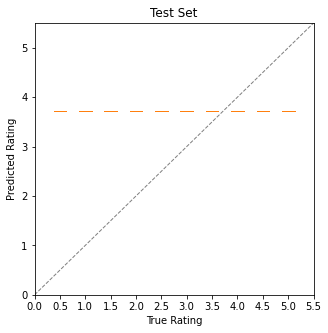

In [50]:
# global mean
global_mean = df_train['rating'].mean()
print("global_mean =", global_mean)
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(global_mean)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# or simply y_pred = np.array([global_mean for i in range(len(y_true))])
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 0.8879007377118994


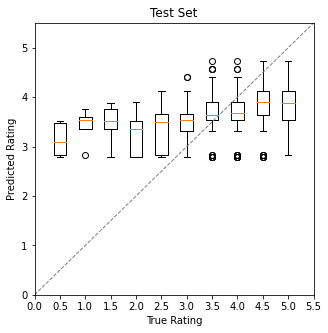

In [51]:
# user mean
user_mean = df_train.groupby('userID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(user_mean[row['userID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 0.9584567325966471


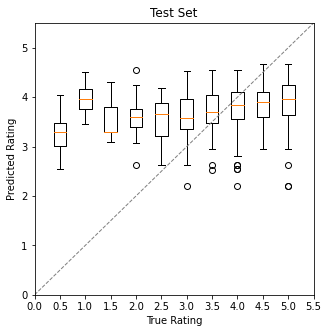

In [52]:
# movie mean
movie_mean = df_train.groupby('movieID')['rating'].mean()
# prediction
y_pred = []
for i, row in df_test.iterrows():
    y_pred.append(movie_mean[row['movieID']])
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

RMSE = 0.8917032936375678


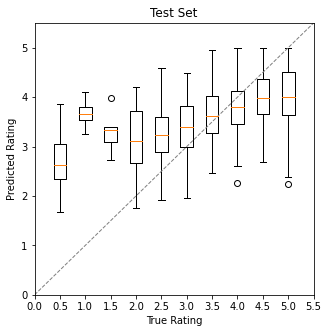

In [53]:
# Combined model
# prediction
y_pred = []
for i, row in df_test.iterrows():
    r = user_mean[row['userID']] + movie_mean[row['movieID']] - global_mean
    y_pred.append(r)
y_pred = np.array(y_pred)
y_pred = np.clip(y_pred, 0.5, 5.0)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

#### 4.3. Trying to beat the baselines with SVD

Can we beat the baselines with SVD? Note, that SVD has many hyperparameters, where the number of factors (`n_factors`) and regularization strength (`reg_all`) are the most important. As is usual in machine learning, you are not allowed to tune them on the test set. Either use cross-validation on the training set or divide the training data into two sets: validation set (~30% of the training data) and actual training set used to fit parameters of the model. 

*Hint: You can use `surprise.model_selection.GridSearchCV` for the hyperparameter tuning. Check an example here: https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv*

I managed to get RMSE = 0.85, can you do better?

In [54]:
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(df_train, reader)

In [55]:
from surprise.model_selection import GridSearchCV

In [56]:
param_grid = {
    #'n_epochs': [20], 
    #'lr_all': [0.005, 0.05],
    'reg_all': [0.01, 0.1], 
    'n_factors': [10, 25, 50],
    #'biased': [True, False]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_surprise)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9877943205761165
{'reg_all': 0.1, 'n_factors': 50}


In [57]:
# We can now use the algorithm that yields the best rmse:
model = gs.best_estimator['rmse']
model.fit(data_surprise.build_full_trainset())

In [58]:
user_ids_true = df_test['userID'].values
movie_ids_true = df_test['movieID'].values

RMSE = 0.8537525362142796


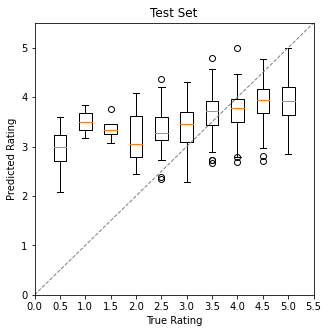

In [59]:
y_pred = []
for user_id, movie_id in zip(user_ids_true, movie_ids_true):
    r = model.predict(user_id, movie_id, verbose=False).est
    y_pred.append(r)
y_pred = np.array(y_pred)
# performance
error = RMSE(y_true, y_pred)
print("RMSE =", error)
MakeBoxplot(y_true, y_pred, 'Test Set')

### 5. Conclusion

Building a good recommender system is not an easy task. Although some algorithms are considered "best practices", they all have their strengths and weaknesses. Developing a recommender system requires a good understanding of domain users, data that can be collected, and purposes of our recommendation. Without knowing all the things mentioned above, it is impossible to design a good recommender system, no matter how complicated are algorithms you use. 

However, there are common techniques that are commonly used by themselves and in combination. Modern recommender systems still use collaborative filtering and content filtering techniques, although nowadays these algorithms are used in combination and with the application of such more advanced techniques as matrix factorization, neural networks, and hybrid recommender systems.

The field of recommender systems is constantly developing, providing us with new studies on context-based recommendation, risk-aware, and group recommendations, as well as research in different evaluation methods and iterative factorization techniques. There are dozens of ways to design a recommender, and choosing "the best" approach is up to people who know why and how they want to make recommendations.